In [18]:
%matplotlib ipympl
# in case we need to run interatively
import pandas
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np



 
### Requirements:
#### 2022 wheat production per 1 million people by country
Load country population dataframe and country production dataframe  
merge into country, population, production dataframe  
Create population by million column  
Create production by million column  
Plot into GeoJson using the productionPerMillion column
  
Wheat production is in million metric tonnes  

#Data extraction. Set up the pandas Dataframe objects from the wheat production and population. Also load in the GeoJson

In [19]:
wheat_production_url = r'https://en.wikipedia.org/wiki/List_of_countries_by_wheat_production'
population_url = r'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population'


wheat_query = pandas.read_html(wheat_production_url)
population_query = pandas.read_html(population_url)
wheat_df = wheat_query[0]
population_df = population_query[0]

# create a geoDataFrame containing the geometry of the world
geoDataFrame = gpd.read_file("C:\\Users\\Trevor\\Documents\\GitHub\\PaletteCohort7\\Trevor\\data\\world_map.geo.json")

Data prep. Clip and merge DataFrames to give country name, population and wheat production.  
Then re-format the population in integer per million  
Then calculate production per million.  
Then clean up rogue value "United States" vs "United States of America"  

In [20]:
# remove totals row as this throws everything off and keep only 2022 data
wheat_production2022 = wheat_df.iloc[1:, :2]
population_2022 = population_df.iloc[1:, 1:3]
# make column names match so we can merge
population_2022.rename(columns={"Location":"Country"}, inplace=True)
# make sure USA matches

data = pandas.merge(wheat_production2022, population_2022, on='Country', how='inner')
data['populationMillion'] = np.where(data["Population"] != 0, data['Population']/1000000 , data['Population'])
data['productionMillion'] = np.where(data['populationMillion'] !=0, data['2022[1]']/data['populationMillion'] , 0)
# make sure the USA value matches
data['Country'] = data['Country'].str.replace("United States", "United States of America")
# rename country to match the geoJson country names
data.rename(columns={"Country": 'sovereignt'}, inplace=True)
data


,sovereignt,2022[1],Population,populationMillion,productionMillion
0,China,137.7,1409670000,1409.670000,0.097682
1,India,107.7,1404910000,1404.910000,0.076660
2,Russia,104.2,146150789,146.150789,0.712962
3,United States of America,44.9,335893238,335.893238,0.133673
4,Australia,36.2,27122411,27.122411,1.334690
5,France,34.6,68513000,68.513000,0.505014
6,Canada,34.3,41288599,41.288599,0.830738
7,Pakistan,26.2,241499431,241.499431,0.108489
8,Germany,22.6,84708010,84.708010,0.266799
9,Argentina,22.2,47067441,47.067441,0.471664


In [33]:
# merge the pandas dataframe containing the production per million with the geoJson map
merged_data_frame = pandas.merge(geoDataFrame, data, on='sovereignt', how='left')
merged_data_frame.fillna(1, inplace=True)
title_text = "Wheat Production (Million Tonnes) Per 1,000,000 People"

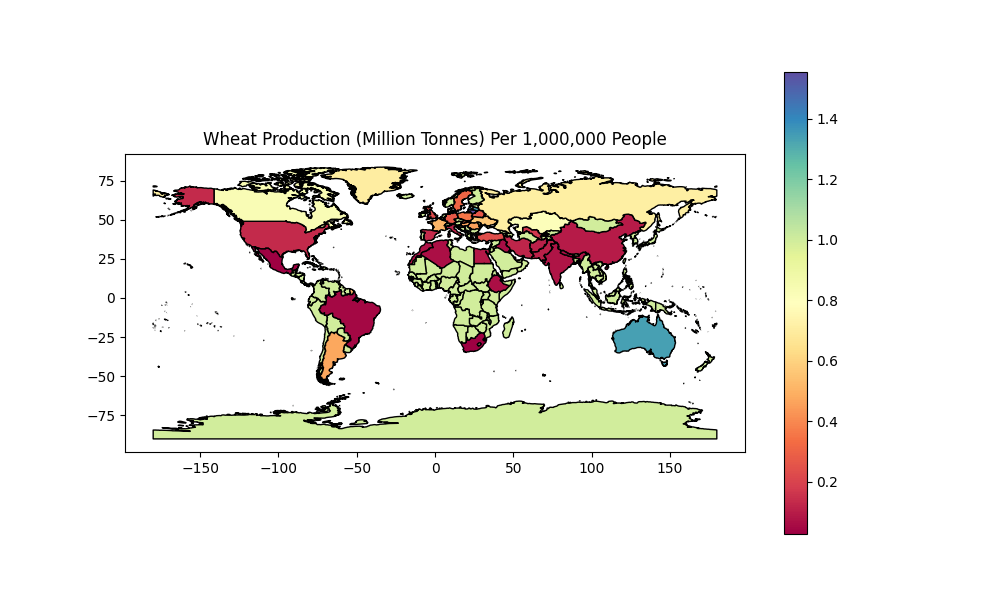

In [34]:
axis = merged_data_frame.plot(column='productionMillion', 
                              legend=True, 
                              aspect=1, 
                              cmap='Spectral',
                              edgecolor='black', 
                              figsize=(10, 6)
                              ).set_title(title_text)

plt.show()